##### Learning about ColumnTransformer

In [5]:
import numpy as np
import pandas as pd

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [7]:
df= pd.read_csv('covid_toy.csv')

In [8]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [9]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='has_covid'), df['has_covid'], test_size=0.2)

In [12]:
X_train

,age,gender,fever,cough,city
93,27,Male,100.0,Mild,Kolkata
75,5,Male,102.0,Mild,Kolkata
43,22,Female,99.0,Mild,Bangalore
26,19,Female,100.0,Mild,Kolkata
7,20,Female,NaN,Strong,Mumbai
...,...,...,...,...,...
45,72,Male,99.0,Mild,Bangalore
56,71,Male,NaN,Strong,Kolkata
34,74,Male,102.0,Mild,Mumbai
32,34,Female,101.0,Strong,Delhi


In [23]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('MissingTnfr', SimpleImputer(), ['fever']),
    ('Cat1tnfr', OrdinalEncoder(categories=[["Mild", "Strong"]]), ['cough']),
    ('Cat2tnfr', OneHotEncoder( drop='first'), ['gender', 'city'])
    ], remainder='passthrough')

transformer.fit_transform(X_train).shape

(80, 7)

In [24]:
transformer.fit_transform(X_test).shape

(20, 7)

##### Pipelines

In [102]:
df = pd.read_csv('train.csv')

In [103]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [104]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [105]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=42)


In [106]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [107]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [122]:
# Impute missing values
transformer1 = ColumnTransformer([
    ('impute_age', SimpleImputer(), [2]),
    ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6]),
], remainder='passthrough')

# One hot Encoding
transformer2 = ColumnTransformer([
    ('ohe_sex_embarked', OneHotEncoder(drop='first', handle_unknown='ignore'), [1, 6])
], remainder='passthrough')

In [128]:
from sklearn.preprocessing import MinMaxScaler
# Scaling
tnfr3 = ColumnTransformer([
    ('tnfr3',  MinMaxScaler(), slice(0, -1))
])

In [129]:
from sklearn.feature_selection import SelectKBest, chi2

tnfr4 = SelectKBest(score_func=chi2, k=8)

In [130]:
from sklearn.tree import  DecisionTreeClassifier

tnfr5 = DecisionTreeClassifier()

#### Creating Pipeline

In [131]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('tnfr1', transformer1),
    ('tnfr2', transformer2),
    ('tnfr3', tnfr3),
    ('tnfr4', tnfr4),
    ('tnfr5', tnfr5),
])

In [132]:
pipe.fit(X_train, y_train)

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

##### Practice Question 

In [166]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [167]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [168]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

In [190]:
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [187]:
num_cols

['pclass', 'age', 'sibsp', 'parch', 'fare']

In [191]:
cat_cols

['sex', 'embarked']

In [ ]:
preprocesser = ColumnTransformer(transformers=[
    ('tnfr1', SimpleImputer(), ['age']),
    ('tnfr2', SimpleImputer(strategy='most_frequent'), ['embarked']),
    ('tnfr3', OneHotEncoder(drop='first',), cat_cols)
], remainder='pa')

In [174]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('scale', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42)),
])

In [175]:
params = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [3, 5, None],
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid = GridSearchCV(pipeline, param_grid=params, cv=3)
grid.fit(X_train, y_train)

ValueError: 
All the 18 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_data.py", line 878, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_data.py", line 914, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'C'

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py", line 1111, in _hstack
    check_array(X, accept_sparse=True, force_all_finite=False)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'S'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py", line 1006, in fit_transform
    return self._hstack(list(Xs), n_samples=n_samples)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py", line 1115, in _hstack
    raise ValueError(
ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.


In [ ]:
print("Best Params: ", grid.best_params_)
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

Best Params:  {'clf__max_depth': 3, 'clf__n_estimators': 50}
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       105
           1       0.89      0.54      0.67        74

    accuracy                           0.78       179
   macro avg       0.82      0.75      0.75       179
weighted avg       0.81      0.78      0.77       179



1. Load Titanic dataset using Seaborn.
2. Use Lasso Regression to select important features.
3. Impute missing values in selected features.
4. Build preprocessing using ColumnTransformer.
5. Create pipeline with RandomForestClassifier.
6. Use RandomizedSearchCV for hyperparameter tuning.
7. Evaluate model with classification report, ROC curve, confusion matrix.
8. Show selected features from RandomizedSearchCV.

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt


In [194]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [196]:

df.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who'], inplace=True)


In [197]:

X_raw = df.drop(columns=['survived', 'sex', 'embarked', 'adult_male', 'alone'])
X_encoded = pd.get_dummies(X_raw, drop_first=True)
y = df['survived']

lasso = LassoCV(cv=5, random_state=42).fit(X_encoded.fillna(0), y)
lasso_coef = pd.Series(lasso.coef_, index=X_encoded.columns)

selected_features = lasso_coef[lasso_coef != 0].index.tolist()
print("Features selected by Lasso: ", selected_features)

Features selected by Lasso:  ['pclass', 'age', 'sibsp', 'parch', 'fare']


In [202]:
X = df[selected_features + ["sex", "embarked"]]
X.head()

,pclass,age,sibsp,parch,fare,sex,embarked
0,3,22.0,1,0,7.2500,male,S
1,1,38.0,1,0,71.2833,female,C
2,3,26.0,0,0,7.9250,female,S
3,1,35.0,1,0,53.1000,female,S
4,3,35.0,0,0,8.0500,male,S


In [204]:
nums_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()

preprocessor = ColumnTransformer([
    ('imputer1', SimpleImputer(strategy='mean'), ['age']),
    ('cat', Pipeline([
        ('imputer2', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='first')),
    ]), cat_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('scale', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

In [205]:
param_dist = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 5, 10, ],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__bootstrap': [True, False],
}

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Search
search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=20, cv=3, verbose=1, n_jobs=-1, random_state=42)

search.fit(X_train, y_train)

print("Best Parameters from RandomizedSearchCV: \n", search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters from RandomizedSearchCV: 
 {'clf__n_estimators': 200, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 4, 'clf__max_depth': 5, 'clf__bootstrap': False}


Confusion Matrix: 
 [[96  9]
 [23 51]]


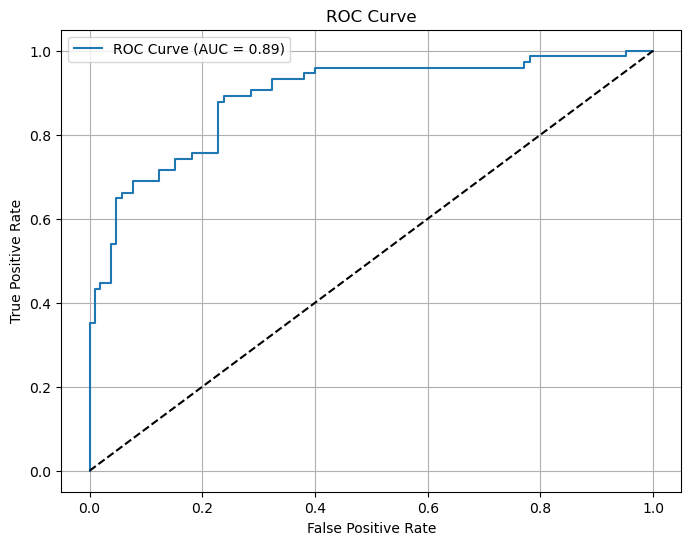

In [206]:
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_mat)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()